# comparing prediction model on volatile (apple stock )and stable stock (exxon mobile)

## installing packages

In [1]:
pip install pandas_datareader


     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.5 kB 281.8 kB/s eta 0:00:01
     ------------------------ ------------ 71.7/109.5 kB 435.7 kB/s eta 0:00:01
     ------------------------------------ 109.5/109.5 kB 530.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
pip install keras-tuner

  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/128.9 kB ? eta -:--:--
   --- ------------------------------------ 10.2/128.9 kB ? eta -:--:--
   ------------ -------------------------- 41.0/128.9 kB 393.8 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/128.9 kB 819.2 kB/s eta 0:00:01
   -------------------------------------- 128.9/128.9 kB 841.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math 
import time 
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from kerastuner.tuners import RandomSearch
import kerastuner
from kerastuner import HyperModel
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
import seaborn as sns
import keras
import sklearn
import pickle
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

C:\Users\michel\AppData\Local\Temp\ipykernel_44868\679909795.py:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch
C:\Users\michel\AppData\Local\Temp\ipykernel_44868\679909795.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [5]:
print(kerastuner.__version__)

1.0.5


In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Apple data set

In [7]:
#get the stock quate
apple=web.DataReader("AAPL",data_source="yahoo",start="1980-01-01",end="2021-02-16")
apple.tail()

TypeError: string indices must be integers, not 'str'

In [ ]:
print('Number of rows and columns:', apple.shape)


In [9]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,10130.000000,10130.000000,10130.000000,10130.000000,1.013000e+04,10130.000000
mean,10.406876,10.181984,10.295722,10.298430,3.388434e+08,9.717573
std,20.882836,20.391513,20.642526,20.646802,3.415273e+08,20.266671
min,0.049665,0.049107,0.049665,0.049107,0.000000e+00,0.038548
25%,0.279297,0.265625,0.272879,0.272321,1.302076e+08,0.230331
50%,0.450893,0.435268,0.444196,0.445313,2.264024e+08,0.371144
75%,11.912232,11.662053,11.782679,11.813125,4.214952e+08,10.158137
max,145.089996,141.369995,143.600006,143.160004,7.421641e+09,142.704010


# Apple visualization

No handles with labels found to put in legend.


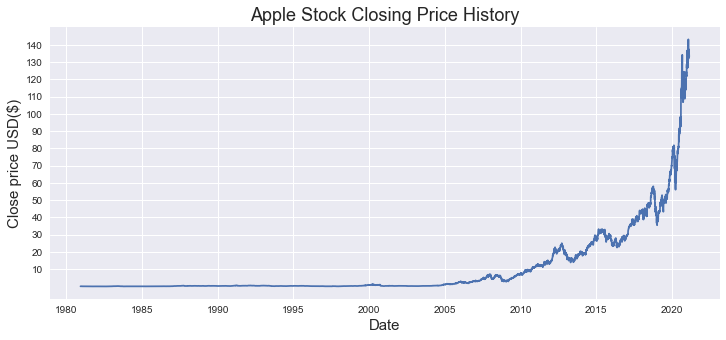

In [10]:

plt.figure(figsize=(12,5))
plt.title("Apple Stock Closing Price History",fontsize=18)
plt.plot(apple["Close"])
# plt.axhline(y=apple["Close"].mean(), color='r', linestyle='dashed',label="avg closing price")
plt.xlabel("Date",fontsize=15)
plt.yticks(np.arange(10,150,10))
plt.ylabel("Close price USD($)",fontsize=15)
plt.legend()
plt.show()

In [11]:
apple['Close'].argmin()

395

In [12]:
apple.iloc[394]

High         5.189700e-02
Low          5.133900e-02
Open         5.133900e-02
Close        5.133900e-02
Volume       3.037440e+07
Adj Close    4.030017e-02
Name: 1982-07-07 00:00:00, dtype: float64

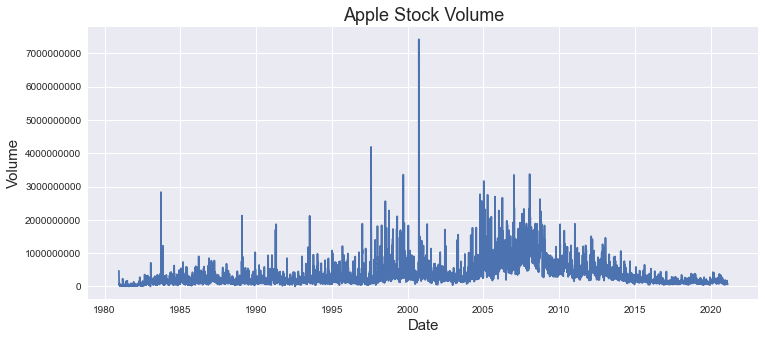

In [13]:

plt.figure(figsize=(12,5))
plt.plot(apple["Volume"])
# plt.axhline(y=apple["Volume"].max(), color='black', linestyle='dashed',label="maximum stocks traded")
# plt.axhline(y=apple["Volume"].min(), color='green', linestyle='dashed',label="minimum stocks traded")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Apple Stock Volume",fontsize=18)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Volume",fontsize=15)
plt.show()

In [14]:
#to get the index of the mximum number of stcks traded
apple["Volume"].argmax()

5004

In [15]:
apple.iloc[[apple.Volume.argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-09-29,0.517857,0.453125,0.503348,0.459821,7.421641e+09,0.395401


In [16]:
apple.iloc[[apple.Volume.argmin()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1981-08-10,0.112723,0.112723,0.112723,0.112723,0.0,0.088485


In [17]:
# plt.figure(figsize=(17,5))
# apple["Close"].plot()
# #rolling is the number of prices that the avrage is taken from  and it is used to calculate the moving avarage to remove the noise of day to day price
# apple["MV50"]=apple["Close"].rolling(50).mean()
# apple["MV50"].plot()
# apple["MV200"]=apple["Close"].rolling(200).mean()
# apple["MV200"].plot(color="g")

In [18]:
apple["returns"]=(apple['Close']/apple['Close'].shift(1))-1

In [19]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close,returns
Date,,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.100751,NaN
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095495,-0.052171
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088485,-0.073398
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.090676,0.024751
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093304,0.028992


#  Apple Data preprocessing

In [20]:
#create a new data frame with only the close column
data_a=apple.filter(["Close"])
#convert the data frame to numpy array
apple_dataset=data_a.values
#get the number of rows to train  the model on
apple_training_data_len=math.ceil(len(apple_dataset)*.8)
apple_training_data_len

8104

In [21]:
#scale the data
scaler_apple=MinMaxScaler(feature_range=(0,1))
scaled_apple=scaler_apple.fit_transform(apple_dataset)
scaled_apple

array([[5.53703418e-04],
       [5.06914575e-04],
       [4.44522406e-04],
       ...,
       [9.43889676e-01],
       [9.45566629e-01],
       [9.30333738e-01]])

In [22]:
#create training dataset
#create scaled training dataset
apple_train_data=scaled_apple[0:apple_training_data_len,:]
#split the data into x_train and y_tarin data sets
x_train_apple=[]
y_train_apple=[]
for i in range(60,len(apple_train_data)):
    x_train_apple.append(apple_train_data[i-60:i,0])
    y_train_apple.append(apple_train_data[i,0])
    if i<=61:
        print(f"X_dataset: {x_train_apple}")
        print()
        print(f"Y_dataset: {y_train_apple}")
        print()


X_dataset: [array([0.0005537 , 0.00050691, 0.00044452, 0.00046402, 0.00048742,
       0.00053811, 0.000581  , 0.00061999, 0.00067068, 0.00076427,
       0.00077986, 0.00075257, 0.00072138, 0.00073307, 0.00070968,
       0.00066288, 0.00061999, 0.0006005 , 0.00065119, 0.00064339,
       0.0006083 , 0.0006122 , 0.00063169, 0.00062389, 0.00068238,
       0.00065119, 0.00067068, 0.00068238, 0.00067848, 0.00066288,
       0.00065509, 0.00062389, 0.0005888 , 0.00053811, 0.00048742,
       0.00051861, 0.0005498 , 0.0005498 , 0.0005537 , 0.00050691,
       0.00050691, 0.00047962, 0.00047182, 0.00045232, 0.00047182,
       0.00050691, 0.00045622, 0.00041333, 0.00042503, 0.00039773,
       0.00044452, 0.00045622, 0.00048352, 0.00048742, 0.00047572,
       0.00046792, 0.00046402, 0.00045622, 0.00039383, 0.00035874])]

Y_dataset: [0.0003314422412202018]

X_dataset: [array([0.0005537 , 0.00050691, 0.00044452, 0.00046402, 0.00048742,
       0.00053811, 0.000581  , 0.00061999, 0.00067068, 0.00076427,

In [23]:
#convert x_train and y_train to numpy arrays
type(x_train_apple)
x_train_apple,y_train_apple=np.array(x_train_apple),np.array(y_train_apple)

In [24]:
#reshape the data
x_train_apple=np.reshape(x_train_apple,(x_train_apple.shape[0],x_train_apple.shape[1],1))


In [25]:
x_train_apple.shape,y_train_apple.shape

((8044, 60, 1), (8044,))

In [26]:
#2->apple
#3->ford
#4->bank of america
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_train_apple,y_train_apple,random_state=42,train_size=0.75)

In [27]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((6033, 60, 1), (2011, 60, 1), (6033,), (2011,))

# create  test data set apple

In [28]:
#create testing data set
#create a new array containing from index 2240-60 to 2799
test_data_apple=scaled_apple[apple_training_data_len-60:,:]
#create x_test and y_test
x_test_apple=[]
y_test_apple=apple_dataset[apple_training_data_len:,:]
for i in range(60,len(test_data_apple)):
    x_test_apple.append(test_data_apple[i-60:i,0])

In [29]:
#convert the data to numpy array
x_test_apple=np.array(x_test_apple)

In [30]:
#reshape the data
x_test_apple=np.reshape(x_test_apple,(x_test_apple.shape[0],x_test_apple.shape[1],1))

In [31]:
x_test_apple.shape

(2026, 60, 1)

# building base model for apple

In [32]:
#apple stock normal
apple_model_basic=tf.keras.Sequential()
apple_model_basic.add(LSTM(32,return_sequences=True,input_shape=(X_train2.shape[1],1)))
apple_model_basic.add(Dropout(rate = 0.2))##add 1st lstm layer
apple_model_basic.add(LSTM(units =32, return_sequences = False))
apple_model_basic.add(Dropout(rate = 0.2))##add 2rd lstm layer
apple_model_basic.add(Dense(1))
apple_model_basic.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [33]:
apple_model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 32)            4352      
_________________________________________________________________
dropout (Dropout)            (None, 60, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [34]:
#a_basic_history=apple_model_basic.fit(X_train2, y_train2,batch_size=512, validation_data=(X_test2, y_test2),epochs=25)


In [35]:

#apple_model_basic.save_weights("model_a_b.h5")
apple_model_basic.load_weights("model_a_b.h5")

In [36]:
# a_b_h=a_basic_history.history
# a_b_df=pd.DataFrame.from_dict(a_b_h)
#a_b_df.to_pickle("./a_b_df.pkl")
a_b_df=pd.read_pickle("./a_b_df.pkl")

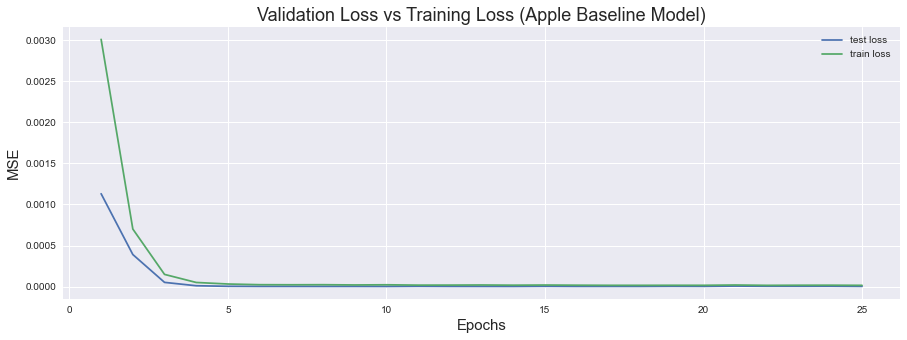

In [37]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(1,26,1), a_b_df['val_loss'],label="test loss")
plt.plot(np.arange(1,26,1),a_b_df['loss'],label="train loss")
# plt.xticks(np.arange(0,26,2))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Validation Loss vs Training Loss (Apple Baseline Model)',fontsize=18)
plt.ylabel('MSE',fontsize=15)
plt.xlabel('Epochs',fontsize=15)
plt.legend()
plt.show()

In [38]:
val_loss_per_epoch = a_b_df['val_loss']
best_epoch = val_loss_per_epoch[a_b_df["val_loss"]==min(val_loss_per_epoch)].index[0]+1
print('Best epoch: %d' % (best_epoch,))


Best epoch: 10


In [39]:
print(min(a_b_df["val_loss"]))

2.320677594980225e-06


In [40]:
loss_apple_b,mae_apple_b=apple_model_basic.evaluate(X_test2, y_test2)

63/63 [==============================] - ETA: 41s - loss: 4.4962e-06 - mean_absolute_error: 0.00 - ETA: 0s - loss: 4.1498e-06 - mean_absolute_error: 0.0010 - ETA: 0s - loss: 3.9239e-06 - mean_absolute_error: 9.9498e-0 - ETA: 0s - loss: 3.7562e-06 - mean_absolute_error: 9.8256e-0 - ETA: 0s - loss: 3.5818e-06 - mean_absolute_error: 9.6767e-0 - ETA: 0s - loss: 3.4614e-06 - mean_absolute_error: 9.5816e-0 - 1s 4ms/step - loss: 3.4547e-06 - mean_absolute_error: 9.5766e-04


In [41]:
print(f"baseline model validation loss(apple): {loss_apple_b}, mean absulote error: {mae_apple_b}")

baseline model validation loss(apple): 3.0297655939648394e-06, mean absulote error: 0.0009259369689971209


In [42]:
#get the models predicted price value
predictions_b_a=apple_model_basic.predict(x_test_apple)
predictions_b_a=scaler_apple.inverse_transform(predictions_b_a)

In [43]:
#get the root mean square error(RMSE) it is higher than model's mse because its on actual prices and the model is on 
#scaled prices
np.sqrt(mean_squared_error(y_test_apple, predictions_b_a))

12.569153687054742

<function matplotlib.pyplot.show(close=None, block=None)>

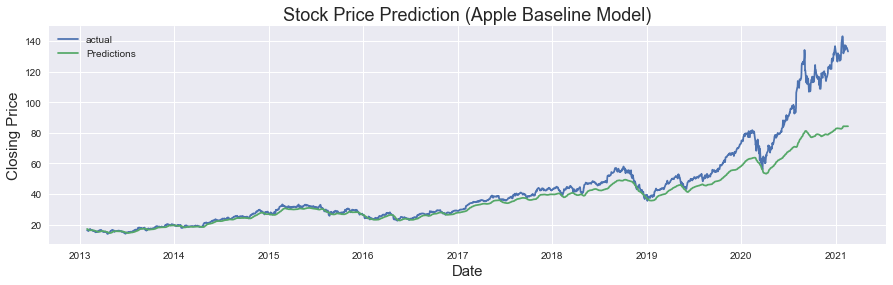

In [44]:
train_a_b=data_a[:apple_training_data_len]
valid_a_b=data_a[apple_training_data_len:]
valid_a_b['predictions']=predictions_b_a
plt.figure(figsize=(15,4))
plt.title("Stock Price Prediction (Apple Baseline Model)",fontsize=18)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Closing Price",fontsize=15)
# plt.plot(train_a_b["Close"])
plt.plot(valid_a_b[['Close',"predictions"]])
plt.legend(["actual","Predictions"],loc='upper left')
plt.show

In [45]:
#as we have same amount of variables in the 4 models i will use r^2 to evaluate and compair models
adj_r_a_b=(1 - (1-sklearn.metrics.r2_score(valid_a_b["Close"],valid_a_b["predictions"]))*(valid_a_b["predictions"].shape[0]-1)/(valid_a_b["predictions"].shape[0]-1-1))
print("adj R squared: {}".format(adj_r_a_b))
adj_r_2={"name of the model":[],"adj R^2":[]}
df_adj_r2=df_marks = pd.DataFrame(adj_r_2)
df_adj_r2=df_adj_r2.append({"name of the model":"apple basline model","adj R^2":adj_r_a_b},ignore_index=True)

adj R squared: 0.7867962504487712


In [46]:
df_adj_r2

,name of the model,adj R^2
0,apple basline model,0.786796


In [47]:
valid_a_b

,Close,predictions
Date,,
2013-01-30,16.315357,17.232903
2013-01-31,16.267500,17.055754
2013-02-01,16.200714,16.890734
2013-02-04,15.797143,16.738884
2013-02-05,16.351429,16.584625
...,...,...
2021-02-09,136.009995,84.349068
2021-02-10,135.389999,84.362587
2021-02-11,135.130005,84.353477


# accuracy of apple baseline model within 5%

In [48]:
p5=[]
for i in range(valid_a_b.shape[0]):
    if valid_a_b['predictions'][i]<=(valid_a_b['Close'][i]*1.05) and valid_a_b['predictions'][i]>=(valid_a_b['Close'][i]*0.95):
        p5.append(int(1))
    else:
        p5.append(int(0))
valid_a_b["p5%"]=p5
valid_a_b["v"]=np.ones((valid_a_b.shape[0],), dtype=int)
print(f'apple baseline model accuracy (5%): {sklearn.metrics.accuracy_score(valid_a_b["v"],valid_a_b["p5%"])}')

apple baseline model accuracy (5%): 0.3711747285291214


# accuracy of apple baseline model within 3%

In [49]:
p3=[]
for i in range(valid_a_b.shape[0]):
    if valid_a_b['predictions'][i]<=(valid_a_b['Close'][i]*1.03) and valid_a_b['predictions'][i]>=(valid_a_b['Close'][i]*0.97):
        p3.append(int(1))
    else:
        p3.append(int(0))
valid_a_b["p3%"]=p3
print(f'apple baseline model accuracy (3%): {sklearn.metrics.accuracy_score(valid_a_b["v"],valid_a_b["p3%"])}')

apple baseline model accuracy (3%): 0.20286278381046396


# accuracy of apple baseline model within 1.5%

In [50]:
p15=[]
for i in range(valid_a_b.shape[0]):
    if valid_a_b['predictions'][i]<=(valid_a_b['Close'][i]*1.015) and valid_a_b['predictions'][i]>=(valid_a_b['Close'][i]*0.985):
        p15.append(int(1))
    else:
        p15.append(int(0))
valid_a_b["p1.5%"]=p15
print(f'apple baseline model accuracy (1.5%): {sklearn.metrics.accuracy_score(valid_a_b["v"],valid_a_b["p1.5%"])}')

apple baseline model accuracy (1.5%): 0.096248766041461


In [51]:
sklearn.metrics.confusion_matrix(valid_a_b["v"],valid_a_b["p5%"])

array([[   0,    0],
       [1274,  752]], dtype=int64)

In [52]:
print("{}%".format(mean_absolute_percentage_error(valid_a_b["Close"],valid_a_b["predictions"])))

9.277579078823887%


# apple tuned hyperparameters

In [53]:
#log_dir=f"{int(time.time())}"

In [54]:
# #build the lstm model
# def build_model(hp):
#     apple_model=tf.keras.Sequential()
#     apple_model.add(LSTM(hp.Int("input units initial",min_value=50,max_value=150,step=25),return_sequences=True,input_shape=(X_train2.shape[1],1)))
#     apple_model.add(Dropout(rate = hp.Choice('dropout ratio initial', values=[0.2, 0.3,0.4])))##add 2rd lstm layer
#     for i in range(hp.Int("n_layers",1,4)):
#         apple_model.add(LSTM(units = hp.Int(f"lstm {i} units",min_value=50,max_value=150,step=25), return_sequences = True))
#         apple_model.add(Dropout(rate = hp.Choice(f'dropout ratio  {i}', values=[0.2, 0.3,0.4])))##add 3rd lstm layer
#     apple_model.add(LSTM(units = hp.Int("input units last",min_value=50,max_value=150,step=25), return_sequences = False))
#     apple_model.add(Dropout(rate = hp.Choice('dropout ratio last', values=[0.2, 0.3,0.4])))
#     for b in range (hp.Int("n_Dense_layers",1,3)):
#         apple_model.add(Dense(hp.Choice(f"dense {b} units", values=[25, 50,75,100])))
#     apple_model.add(Dense(1))
#     hp_learning_rate = hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
#     apple_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
#     return apple_model

In [55]:
#build the lstm model
# def build_model(hp):
#     apple_model=tf.keras.Sequential()
#     apple_model.add(LSTM(256,return_sequences=True,input_shape=(X_train2.shape[1],1)))
#     apple_model.add(Dropout(rate =0.3 ))##add 2rd lstm layer
#     apple_model.add(LSTM(256, return_sequences = False))
#     apple_model.add(Dropout(rate =0.2 )) ##add 2rd lstm layer
#     apple_model.add(Dense(16))
#     apple_model.add(Dense(1))
#     hp_learning_rate = hp.Choice('learning_rate', values=[0.001,0.002, 0.003,0.0015, 0.0001])
#     apple_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= hp_learning_rate),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
#     return apple_model

In [56]:
# tuner=RandomSearch(build_model,
#                   objective="val_loss",
#                   max_trials=5,
#                   executions_per_trial=1,
#                    directory=log_dir
#                   )
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# tuner.search(x=X_train2,y=y_train2,epochs=25,batch_size=256,validation_data=(X_test2,y_test2),callbacks=[stop_early])


In [57]:
# print(tuner.get_best_models()[0].summary())

In [58]:
# best_hps=tuner.get_best_hyperparameters(num_trials=1)[0].values
# best_hps

In [59]:
#disny stock not tuned hyper parametter
apple_model_tuned=tf.keras.Sequential()
apple_model_tuned.add(LSTM(256,return_sequences=True,input_shape=(X_train2.shape[1],1)))
apple_model_tuned.add(Dropout(rate = 0.3))##add 2rd lstm layer
apple_model_tuned.add(LSTM(units =256, return_sequences = False))
apple_model_tuned.add(Dropout(rate = 0.2))##add 3rd lstm layer
apple_model_tuned.add(Dense(16))
apple_model_tuned.add(tf.keras.layers.Dense( 1)) 
apple_model_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [60]:
apple_model_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 256)           264192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                4112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 793,633
Trainable params: 793,633
Non-trainable params: 0
________________________________________________

# custom callbacks and check points

In [61]:
# class CustomCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if logs.get('val_loss') <= 9.9e-07:
#             self.model.stop_training = True
# callback = CustomCallback()


In [62]:
a_checkpoint_path = "train_ckpt_apple_new/cp.ckpt"
# a_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=a_checkpoint_path,save_best_only=True, save_weights_only=True, verbose=1)

In [63]:
# a_tuned_history=apple_model_tuned.fit(X_train2, y_train2,batch_size=128, validation_data=(X_test2, y_test2),epochs=250,callbacks=[a_cp_callback])

In [64]:
apple_model_tuned.load_weights(a_checkpoint_path)

In [65]:
# a_t_h=a_tuned_history.history
# a_t_df=pd.DataFrame.from_dict(a_t_h)
# a_t_df.to_pickle("./a_t_df.pkl")
a_t_df=pd.read_pickle("./a_t_df.pkl")

In [66]:
a_t_df

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.000140,0.006873,0.000004,0.001023
1,0.000007,0.001326,0.000002,0.000675
2,0.000006,0.001353,0.000004,0.001413
3,0.000005,0.001115,0.000002,0.000738
4,0.000005,0.001137,0.000007,0.001922
...,...,...,...,...
245,0.000006,0.001587,0.000001,0.000855
246,0.000003,0.001144,0.000002,0.000644
247,0.000003,0.001049,0.000004,0.000830
248,0.000004,0.001281,0.000002,0.001079


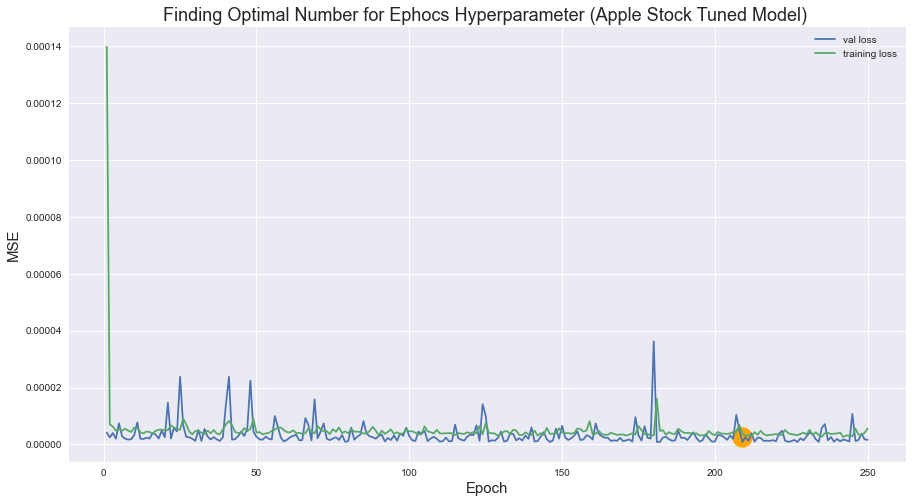

In [67]:
 
plt.figure(figsize=(15,8))
plt.plot(np.arange(1,251,1),a_t_df['val_loss'],label="val loss")
plt.plot(np.arange(1,251,1),a_t_df['loss'],label="training loss")
# plt.xticks(np.arange(1,51,5))
# plt.axhline(y=min(a_t_df['val_loss']), color='r', linestyle='dashed',label=f"min MSE {min(a_t_df['val_loss'])}")
plt.title('Finding Optimal Number for Ephocs Hyperparameter (Apple Stock Tuned Model) ',fontsize=18)
best_epoch_apple=a_t_df.index[a_t_df["val_loss"]==min(a_t_df["val_loss"])]
plt.scatter([best_epoch_apple[0]+1],[a_t_df.loc[:,"val_loss"][best_epoch_apple[0]+1]],color="orange",s=400)
plt.ylabel('MSE',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend()
plt.show()

In [68]:
print(" best validation loss : {}".format(min(a_t_df["val_loss"])))

 best validation loss : 8.331414846907137e-07


In [69]:
val_loss_per_epoch = a_t_df["val_loss"]
best_epoch_a=val_loss_per_epoch[a_t_df["val_loss"]==min(val_loss_per_epoch)].index[0]+1
# best_epoch_a = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch_a,))


Best epoch: 209


In [70]:
#get the models predicted price value
predictions_t_a=apple_model_tuned.predict(x_test_apple)
predictions_t_a=scaler_apple.inverse_transform(predictions_t_a)

In [71]:
print(f" RMSE IN DOLLARS on Testing set: {np.sqrt(mean_squared_error(y_test_apple, predictions_t_a))}")

 RMSE IN DOLLARS on Testing set: 2.6467458174295415


209


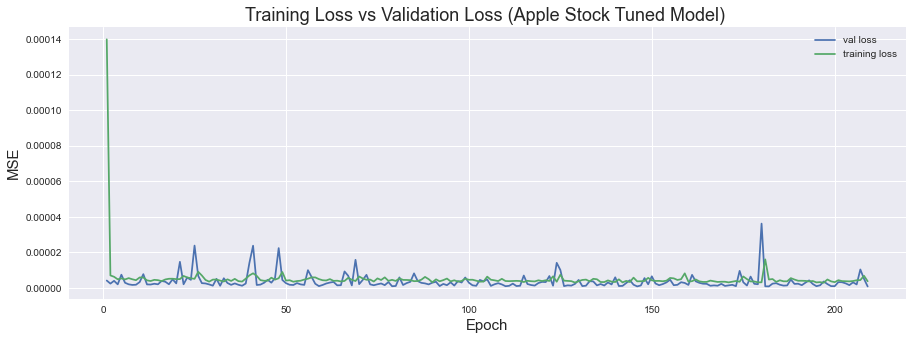

In [72]:

best_epoch_apple=a_t_df.index[a_t_df["val_loss"]==min(a_t_df["val_loss"])]
print(best_epoch_apple[0]+1)
plt.figure(figsize=(15.,5))
plt.plot(np.arange(1,best_epoch_apple[0]+2,1),a_t_df['val_loss'][0:best_epoch_apple[0]+1],label="val loss")
plt.plot(np.arange(1,best_epoch_apple[0]+2,1),a_t_df['loss'][0:best_epoch_apple[0]+1],label="training loss")
plt.title('Training Loss vs Validation Loss (Apple Stock Tuned Model) ',fontsize=18)
plt.ylabel('MSE',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend()
plt.show()

In [73]:
loss_apple,mae_apple=apple_model_tuned.evaluate(X_test2, y_test2)


63/63 [==============================] - ETA: 42s - loss: 2.5369e-07 - mean_absolute_error: 2.9771e- - ETA: 4s - loss: 2.3654e-07 - mean_absolute_error: 2.9561e-04 - ETA: 3s - loss: 2.1900e-07 - mean_absolute_error: 2.8735e-0 - ETA: 3s - loss: 2.7990e-07 - mean_absolute_error: 2.9773e-0 - ETA: 3s - loss: 3.6993e-07 - mean_absolute_error: 3.1862e-0 - ETA: 3s - loss: 5.7765e-07 - mean_absolute_error: 3.4933e-0 - ETA: 3s - loss: 7.0324e-07 - mean_absolute_error: 3.6913e-0 - ETA: 3s - loss: 7.8569e-07 - mean_absolute_error: 3.8381e-0 - ETA: 3s - loss: 8.3895e-07 - mean_absolute_error: 3.9427e-0 - ETA: 3s - loss: 8.7996e-07 - mean_absolute_error: 4.0368e-0 - ETA: 3s - loss: 9.0670e-07 - mean_absolute_error: 4.1043e-0 - ETA: 3s - loss: 9.2493e-07 - mean_absolute_error: 4.1531e-0 - ETA: 3s - loss: 9.3512e-07 - mean_absolute_error: 4.1849e-0 - ETA: 3s - loss: 9.4052e-07 - mean_absolute_error: 4.2062e-0 - ETA: 3s - loss: 9.4230e-07 - mean_absolute_error: 4.2176e-0 - ETA: 3s - loss: 9.4091e-07 -

In [74]:
print(f"best validation loss(apple tuned): {loss_apple}, mean absulote error: {mae_apple}")

best validation loss(apple tuned): 7.114203413038922e-07, mean absulote error: 0.00039097346598282456


In [75]:
#get the models predicted price value
predictions_t_a=apple_model_tuned.predict(x_test_apple)
predictions_t_a=scaler_apple.inverse_transform(predictions_t_a)

In [76]:
print(f"RMSE IN DOLLARS on Testing set: {np.sqrt(mean_squared_error(y_test_apple, predictions_t_a))}")

RMSE IN DOLLARS on Testing set: 2.6467458174295415


In [77]:
#print("persentage from the mean actual price: {:.2%}".format((np.sqrt(mean_squared_error(y_test_apple, predictions_t_a)))/y_test_apple.mean()))

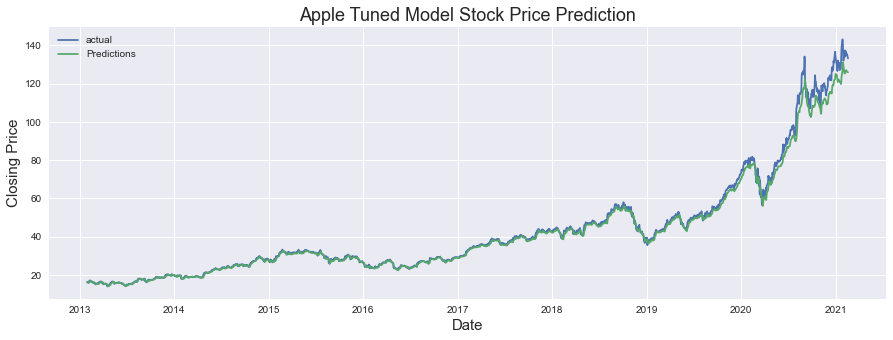

In [78]:
train_a_t=data_a[:apple_training_data_len]
valid_a_t=data_a[apple_training_data_len:]
valid_a_t['predictions']=predictions_t_a
plt.figure(figsize=(15,5))
plt.title("Apple Tuned Model Stock Price Prediction",fontsize=18)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Closing Price",fontsize=15)
# plt.plot(train_a_t["Close"])
plt.plot(valid_a_t[['Close',"predictions"]])
plt.legend(["actual","Predictions"],loc='upper left')
plt.show()


In [79]:
def mape(row):
    return mean_absolute_percentage_error(row["Close"],row["predictions"])

In [80]:
valid_a_t["mape"]=valid_a_t.apply(lambda row: mape(row),axis=1)

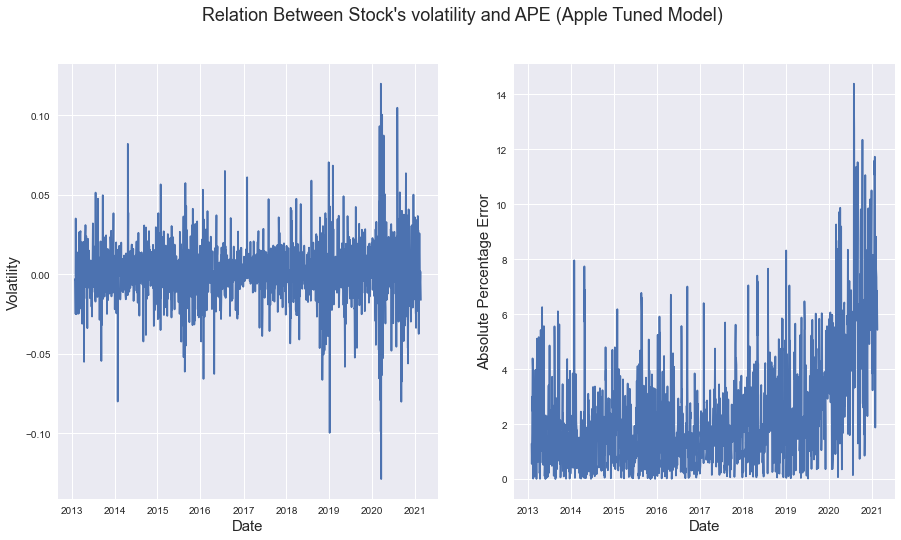

In [81]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
fig.suptitle("Relation Between Stock's volatility and APE (Apple Tuned Model)",fontsize=18)
ax2.plot(apple[apple_training_data_len:].index,valid_a_t['mape'])
# ax2.set_title("Mean Absolute Percentage Error on Test Data(Exxon Mobile Tuned Model)",fontsize=15)
ax2.set_ylabel("Absolute Percentage Error",fontsize=15)
ax2.set_xlabel("Date",fontsize=15)
ax1.plot(apple[apple_training_data_len:]["returns"])
ax1.set_xlabel("Date",fontsize=15)
ax1.set_ylabel("Volatility",fontsize=15)
# ax1.set_title("Volatility of Exxon Mobile Stock(Test Data)",fontsize=14)
plt.show()


In [82]:
#as we have same amount of variables in the 4 models i will use r^2 to evaluate and compair models
adj_r_a_t=1 - (1-sklearn.metrics.r2_score(valid_a_t["Close"],valid_a_t["predictions"]))*(valid_a_t["predictions"].shape[0]-1)/(valid_a_t["predictions"].shape[0]-1-1)
print("adj R squared: {}".format(adj_r_a_t))
df_adj_r2=df_adj_r2.append({"name of the model":"apple tuned model","adj R^2":adj_r_a_t},ignore_index=True)

adj R squared: 0.9905461820250626


In [83]:
df_adj_r2

,name of the model,adj R^2
0,apple basline model,0.786796
1,apple tuned model,0.990546


In [84]:
valid_a_t

,Close,predictions,mape
Date,,,
2013-01-30,16.315357,16.105631,1.285454
2013-01-31,16.267500,16.125957,0.870093
2013-02-01,16.200714,16.111378,0.551435
2013-02-04,15.797143,16.060469,1.666920
2013-02-05,16.351429,15.860855,3.000190
...,...,...,...
2021-02-09,136.009995,127.121223,6.535381
2021-02-10,135.389999,126.902031,6.269273
2021-02-11,135.130005,126.471817,6.407302


# checking accuracy of apple's optimized model within 5% of the actual price

In [85]:
p5=[]
for i in range(valid_a_t.shape[0]):
    if valid_a_t['predictions'][i]<=(valid_a_t['Close'][i]*1.05) and valid_a_t['predictions'][i]>=(valid_a_t['Close'][i]*0.95):
        p5.append(int(1))
    else:
        p5.append(int(0))
valid_a_t["p5%"]=p5
valid_a_t["v"]=np.ones((valid_a_t.shape[0],), dtype=int)
print(f'apple optimal model accuracy (5%): {sklearn.metrics.accuracy_score(valid_a_t["v"],valid_a_t["p5%"])}')

apple optimal model accuracy (5%): 0.8859822309970385


# checking accuracy of apple's optimized model within 3% of the actual price

In [86]:
p3=[]
for i in range(valid_a_t.shape[0]):
    if valid_a_t['predictions'][i]<=(valid_a_t['Close'][i]*1.03) and valid_a_t['predictions'][i]>=(valid_a_t['Close'][i]*0.97):
        p3.append(int(1))
    else:
        p3.append(int(0))
valid_a_t["p3%"]=p3
print(f'apple optimal model accuracy (3%): {sklearn.metrics.accuracy_score(valid_a_t["v"],valid_a_t["p3%"])}')

apple optimal model accuracy (3%): 0.7127344521224087


# checking accuracy of apple's optimized model within 1.5% of the actual price

In [87]:
p15=[]
for i in range(valid_a_t.shape[0]):
    if valid_a_t['predictions'][i]<=(valid_a_t['Close'][i]*1.015) and valid_a_t['predictions'][i]>=(valid_a_t['Close'][i]*0.985):
        p15.append(int(1))
    else:
        p15.append(int(0))
valid_a_t["p1.5%"]=p15
print(f'apple optimal model accuracy (1.5%): {sklearn.metrics.accuracy_score(valid_a_t["v"],valid_a_t["p1.5%"])}')

apple optimal model accuracy (1.5%): 0.40819348469891414


In [88]:
print("{}%".format(mean_absolute_percentage_error(valid_a_t["Close"],valid_a_t["predictions"])))

2.3916125328680615%


In [89]:
# m=[np.nan]
# for i in range(0,valid.shape[0]-1):
#     if ((valid['predictions'][i+1]-valid['predictions'][i])*( valid['Close'][i+1]- valid['Close'][i]))>0:
#         m.append(int(1))
#     else:
#         m.append(int(0))
# valid["m"]=m
# valid.dropna(inplace=True)
# sklearn.metrics.accuracy_score(valid["v"],valid["m"])

In [90]:
# valid

# apple tunned hyperparameters graphs

In [91]:
# pd.set_option('display.float_format', '{:.9f}'.format)

In [92]:
layers_apple=pd.read_excel("thesis excel apple.xlsx", sheet_name="number of layers",engine='openpyxl')
layers_apple
#,sheet_name="number of layers"


,layers,total number of layers,mse
0,"[5 lstm,4 dense]",9,0.000006
1,"[4 lstm,4 dense]",8,0.000005
2,"[4 lstm,3 dense]",7,0.000006
3,"[2 lstm,3 dense]",5,0.000002
4,"[5 lstm,2 dense]",7,0.000005
5,"[4 lstm,1 dense]",5,0.000004
6,"[2 lstm,2 dense]",4,0.000002
7,"[3 lstm,2dense]",5,0.000004
8,"[2 lstm,4 dense]",6,0.000003


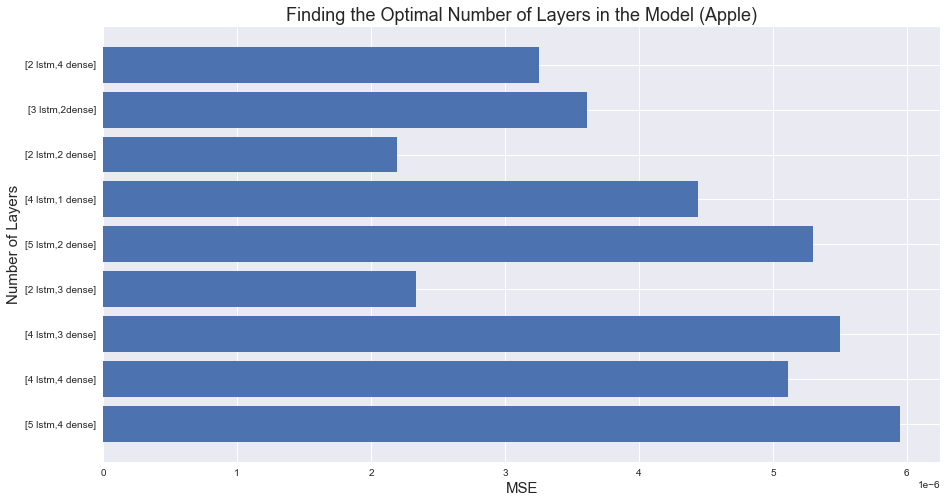

In [93]:
plt.figure(figsize=(15,8))
plt.barh(y=layers_apple["layers"],width=layers_apple["mse"])
plt.ylabel("Number of Layers",fontsize=15)
plt.xlabel("MSE",fontsize=15)
plt.title("Finding the Optimal Number of Layers in the Model (Apple)",fontsize=18)
plt.show()

In [94]:
cells_apple=pd.read_excel("thesis excel apple.xlsx", sheet_name="units per layer",engine='openpyxl')
cells_apple=cells_apple[cells_apple["mse"]<float(0.0000021)]
#,sheet_name="number of layers"

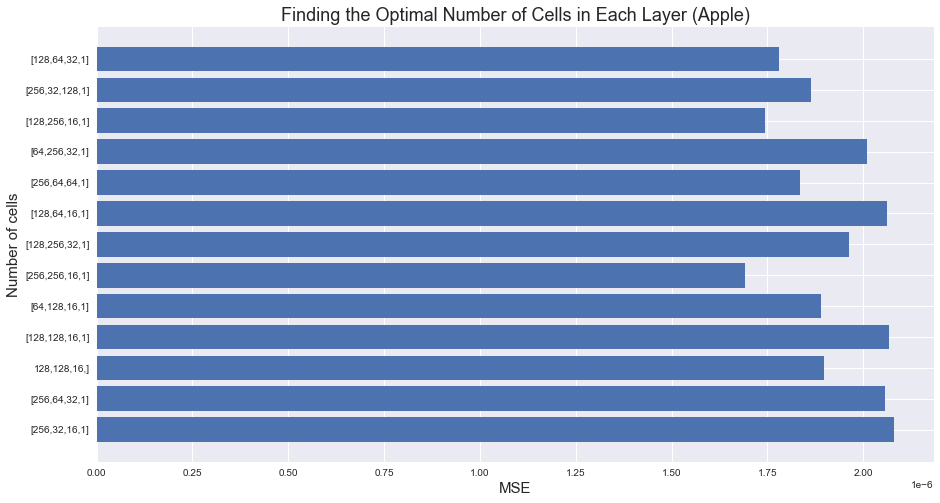

In [95]:
plt.figure(figsize=(15,8))
plt.barh(y=cells_apple["units per layer"],width=cells_apple["mse"])
plt.ylabel("Number of cells",size=15)
plt.xlabel("MSE",size=15)
plt.title("Finding the Optimal Number of Cells in Each Layer (Apple)",size=18)
plt.show()

In [96]:
dropout_apple=pd.read_excel("thesis excel apple.xlsx", sheet_name="dropout rate",engine='openpyxl')
dropout_apple
#,sheet_name="number of layers"

,dropout,mse
0,"[0.3,0.3]",0.000002
1,"[0.4,0.4]",0.000002
2,"[0.2,0.2]",0.000002
3,"[0.4,0.3]",0.000002
4,"[0.3,0.4]",0.000002
5,"[0.2,0.4]",0.000002
6,"[0.4,0.2]",0.000002
7,"[0.2,0.3]",0.000002
8,"[0.3,0.2]",0.000002


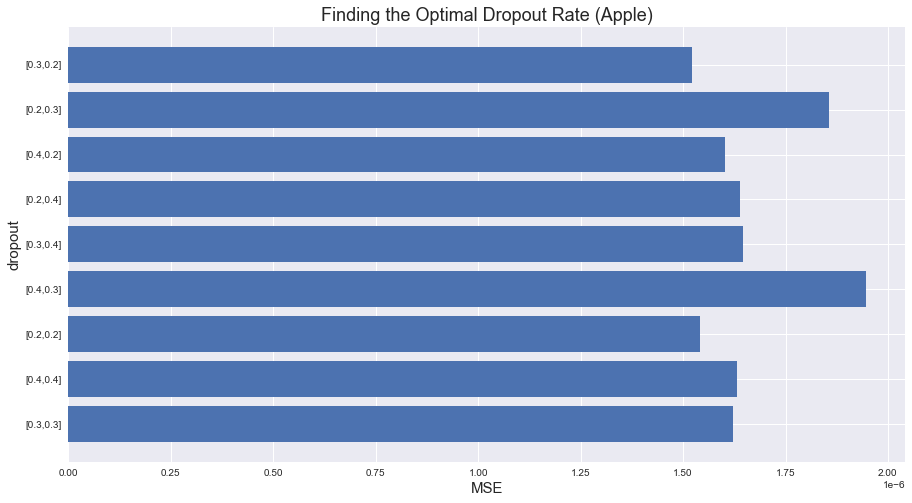

In [97]:
plt.figure(figsize=(15,8))
plt.barh(y=dropout_apple["dropout"],width=dropout_apple["mse"])
plt.ylabel("dropout",size=15)
plt.xlabel("MSE",size=15)
plt.title("Finding the Optimal Dropout Rate (Apple)",size=18)
plt.show()

In [98]:
lr_apple=pd.read_excel("thesis excel apple.xlsx", sheet_name="lr",engine='openpyxl')
lr_apple.dropna(inplace=True)
#,sheet_name="number of layers"

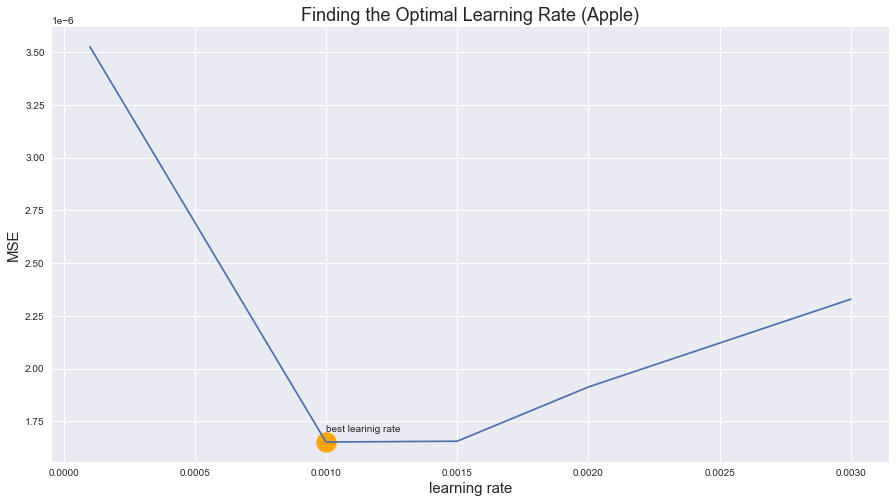

In [99]:
plt.figure(figsize=(15,8))
sns.lineplot(x=lr_apple["lr"],y=lr_apple["mse"])
plt.xlabel("learning rate",size=15)
plt.ylabel("MSE",size=15)
minimal_index=lr_apple.index[lr_apple["mse"]==min(lr_apple["mse"])]
plt.scatter( [lr_apple["lr"][minimal_index[0]]],[lr_apple["mse"][minimal_index[0]]] ,color="orange",s=400)
plt.annotate("best learinig rate", (lr_apple["lr"][minimal_index],lr_apple["mse"][minimal_index]),xytext=(lr_apple["lr"][minimal_index]-0.00000005,lr_apple["mse"][minimal_index]+0.00000005))
plt.title("Finding the Optimal Learning Rate (Apple)",size=18)
plt.show()

In [100]:
# #disny stock not tuned hyper parametter
# apple_model_tuned1=tf.keras.Sequential()
# apple_model_tuned1.add(LSTM(128,return_sequences=True,input_shape=(X_train2.shape[1],1)))
# apple_model_tuned1.add(Dropout(rate = 0.2))##add 2rd lstm layer
# apple_model_tuned1.add(LSTM(units =128, return_sequences = False))
# apple_model_tuned1.add(Dropout(rate = 0.2))##add 3rd lstm layer
# apple_model_tuned1.add(Dense(64))
# apple_model_tuned1.add(tf.keras.layers.Dense( 1)) 
# apple_model_tuned1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [101]:
# a_tuned_history1=apple_model_tuned.fit(X_train2, y_train2,batch_size=512, validation_data=(X_test2, y_test2),epochs=50)

In [102]:
# train=data[:apple_training_data_len]
# valid=data[apple_training_data_len:]
# valid['predictions']=predictions_t_a
# plt.figure(figsize=(15,4))
# plt.title("Apple model stock price prediction")
# plt.xlabel("date",fontsize=18)
# plt.ylabel("closing price",fontsize=18)
# plt.plot(train["Close"])
# plt.plot(valid[['Close',"predictions"]])
# plt.legend(["Train","Val","Predictions"],loc='upper left')
# plt.show


# exxon exxon Company stock

In [103]:
#get the stock quate
exxon=web.DataReader("XOM",data_source="yahoo",start="1980-01-01",end="2021-02-16")
exxon.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-09,50.959999,49.770000,50.669998,50.630001,28977000.0,49.903015
2021-02-10,51.419998,50.389999,50.630001,51.119999,25723800.0,50.385975
2021-02-11,50.930000,48.779999,50.889999,49.840000,26972200.0,49.124355
2021-02-12,50.709999,49.410000,49.430000,50.520000,19756700.0,49.794594
2021-02-16,52.529999,51.619999,51.959999,52.040001,28060100.0,51.292767


In [104]:
exxon.describe()

,High,Low,Open,Close,Volume,Adj Close
count,10370.000000,10370.000000,10370.000000,10370.000000,1.037000e+04,10370.000000
mean,42.113497,41.354574,41.734579,41.747375,1.181789e+07,27.203830
std,31.418639,30.922133,31.171589,31.181199,9.420072e+06,24.479991
min,3.171875,3.109375,3.140625,3.125000,3.828000e+05,0.553719
25%,12.156250,11.937500,12.031250,12.031250,5.376900e+06,4.281110
50%,37.187500,36.410000,36.799999,36.821251,9.200000e+06,20.210033
75%,74.617502,72.795002,73.647501,73.697498,1.481818e+07,50.241184
max,104.760002,103.949997,104.419998,104.379997,1.180235e+08,76.140144


In [105]:
exxon.Close.argmin()

660

In [106]:
exxon.iloc[660]

High         3.171875e+00
Low          3.125000e+00
Open         3.156250e+00
Close        3.125000e+00
Volume       7.299200e+06
Adj Close    6.942022e-01
Name: 1982-08-12 00:00:00, dtype: float64

# exxon Data Visualization

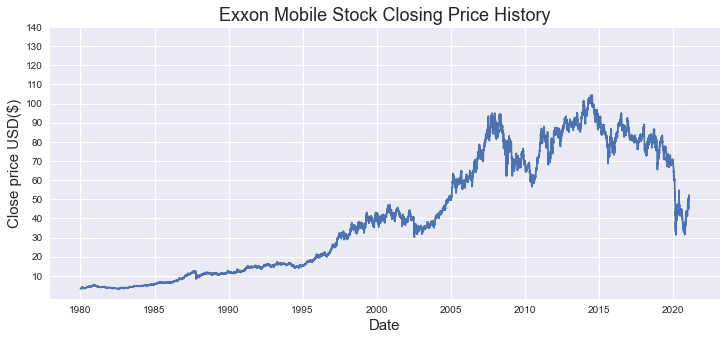

In [107]:

plt.figure(figsize=(12,5))
plt.title("Exxon Mobile Stock Closing Price History",fontsize=18)
plt.plot(exxon["Close"])
#plt.axhline(y=exxon["Close"].mean(), color='r', linestyle='dashed',label="avg closing price")
plt.xlabel("Date",fontsize=15)
plt.yticks(np.arange(10,150,10))
plt.ylabel("Close price USD($)",fontsize=15)

plt.show()

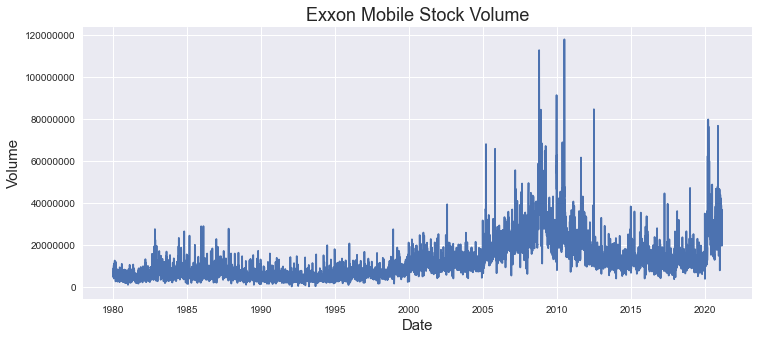

In [108]:

plt.figure(figsize=(12,5))
plt.plot(exxon["Volume"])
# plt.axhline(y=exxon["Volume"].max(), color='black', linestyle='dashed',label="maximum stocks traded")
# plt.axhline(y=exxon["Volume"].min(), color='green', linestyle='dashed',label="minimum stocks traded")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Exxon Mobile Stock Volume",fontsize=18)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Volume",fontsize=15)
plt.show()

In [109]:
# plt.figure(figsize=(17,5))
# exxon["Close"].plot()
# #rolling is the number of prices that the avrage is taken from  and it is used to calculate the moving avarage to remove the noise of day to day price
# exxon["MV50"]=exxon["Close"].rolling(50).mean()
# exxon["MV50"].plot()
# exxon["MV200"]=exxon["Close"].rolling(200).mean()
# exxon["MV200"].plot(color="g")

In [110]:
exxon["returns"]=(exxon['Close']/exxon['Close'].shift(1))-1

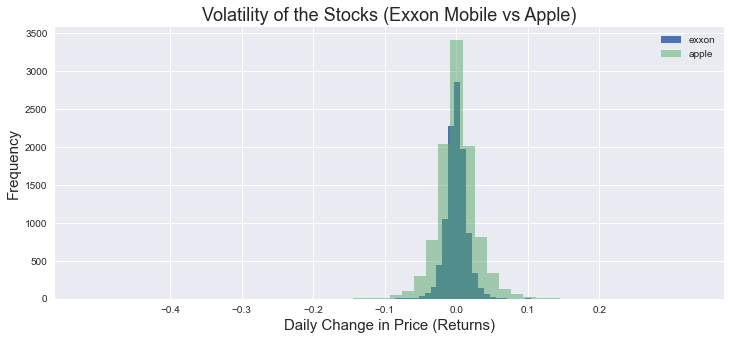

In [111]:
#the wider the more volitil 
plt.figure(figsize=(12,5))
plt.xlabel("Daily Change in Price (Returns)",fontsize=15)
exxon["returns"].hist(bins=50,label='exxon')
apple["returns"].hist(bins=50,alpha=0.5,label='apple')
plt.xticks(np.arange(-0.4,0.2,0.1))
plt.title("Volatility of the Stocks (Exxon Mobile vs Apple)",fontsize=18)
plt.ylabel("Frequency",fontsize=15)
plt.legend()
plt.show()

In [112]:
exxon["returns"].std()

0.01544209550620302

In [113]:
exxon.returns.describe()

count    10369.000000
mean         0.000384
std          0.015442
min         -0.234286
25%         -0.007634
50%          0.000000
75%          0.008439
max          0.179104
Name: returns, dtype: float64

In [114]:
apple['returns'].std()

0.02863107749258888

In [115]:
apple['returns'].describe()

count    10129.000000
mean         0.001103
std          0.028631
min         -0.518692
25%         -0.013244
50%          0.000000
75%          0.014814
max          0.332280
Name: returns, dtype: float64

# exxon data preprocessing

In [116]:
#create a new data frame with only the close column
data=exxon.filter(["Close"])
#convert the data frame to numpy array
exxon_dataset=data.values
#get the number of rows to train  the model on
exxon_training_data_len=math.ceil(len(exxon_dataset)*.8)
exxon_training_data_len

8296

In [117]:
#scale the data
scaler_exxon=MinMaxScaler(feature_range=(0,1))
scaled_exxon=scaler_exxon.fit_transform(exxon_dataset)
scaled_exxon

array([[0.00239186],
       [0.00154313],
       [0.00185176],
       ...,
       [0.46135995],
       [0.46807567],
       [0.48308728]])

In [118]:
#create training dataset
#create scaled training dataset
exxon_train_data=scaled_exxon[0:exxon_training_data_len,:]
#split the data into x_train and y_tarin data sets
x_train_exxon=[]
y_train_exxon=[]
for i in range(60,len(exxon_train_data)):
    x_train_exxon.append(exxon_train_data[i-60:i,0])
    y_train_exxon.append(exxon_train_data[i,0])
    if i<=61:
        print(x_train_exxon)
        print(y_train_exxon)
        print()

[array([0.00239186, 0.00154313, 0.00185176, 0.00169745, 0.00192892,
       0.0016203 , 0.00154313, 0.00146598, 0.00192892, 0.00277764,
       0.00308627, 0.00331774, 0.00324058, 0.00354921, 0.00370352,
       0.00501519, 0.00540097, 0.00493803, 0.00594107, 0.00594107,
       0.00671264, 0.00671264, 0.00810146, 0.00686695, 0.00671264,
       0.00786998, 0.00879586, 0.01003037, 0.01010753, 0.01018468,
       0.01041616, 0.00918165, 0.00864155, 0.00794714, 0.00902734,
       0.00871871, 0.00941312, 0.00949028, 0.01003037, 0.00995322,
       0.00949028, 0.00949028, 0.00895018, 0.00933596, 0.00902734,
       0.00810146, 0.00671264, 0.00655832, 0.00686695, 0.00709842,
       0.00663547, 0.00617253, 0.00470656, 0.00555528, 0.00547813,
       0.00486088, 0.00524665, 0.00432077, 0.00362637, 0.00370352])]
[0.0033177421949494752]

[array([0.00239186, 0.00154313, 0.00185176, 0.00169745, 0.00192892,
       0.0016203 , 0.00154313, 0.00146598, 0.00192892, 0.00277764,
       0.00308627, 0.00331774, 0.

In [119]:
#convert x_train and y_train to numpy arrays
type(x_train_exxon)
x_train_exxon,y_train_exxon=np.array(x_train_exxon),np.array(y_train_exxon)
x_train_exxon.shape

(8236, 60)

In [120]:
#reshape the data
x_train_exxon=np.reshape(x_train_exxon,(x_train_exxon.shape[0],x_train_exxon.shape[1],1))

In [121]:
x_train_exxon.shape,y_train_exxon.shape

((8236, 60, 1), (8236,))

In [122]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_train_exxon,y_train_exxon,random_state=42,train_size=0.75)

In [123]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape

((6177, 60, 1), (2059, 60, 1), (6177,), (2059,))

# exxon test data

In [124]:
#create testing data set
test_data_exxon=scaled_exxon[exxon_training_data_len-60:,:]
#create x_test and y_test
x_test_exxon=[]
y_test_exxon=exxon_dataset[exxon_training_data_len:,:]
for i in range(60,len(test_data_exxon)):
    x_test_exxon.append(test_data_exxon[i-60:i,0])

In [125]:
#convert the data to numpy array
x_test_exxon=np.array(x_test_exxon)

In [126]:
#reshape the data
x_test_exxon=np.reshape(x_test_exxon,(x_test_exxon.shape[0],x_test_exxon.shape[1],1))

In [127]:
x_test_exxon.shape

(2074, 60, 1)

# exxon baseline model

In [128]:
#apple stock normal
exxon_model_basic=tf.keras.Sequential()
exxon_model_basic.add(LSTM(32,return_sequences=True,input_shape=(X_train3.shape[1],1)))
exxon_model_basic.add(Dropout(rate = 0.2))##add 1st lstm layer
exxon_model_basic.add(LSTM(units =32, return_sequences = False))
exxon_model_basic.add(Dropout(rate = 0.2))##add 2rd lstm layer
exxon_model_basic.add(Dense(1))
exxon_model_basic.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [129]:
exxon_model_basic.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 32)            4352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [130]:
#e_basic_history1=exxon_model_basic.fit(X_train3, y_train3,batch_size=512, validation_data=(X_test3, y_test3),epochs=25)

In [131]:
#exxon_model_basic.save_weights("model_e_b.h5")
exxon_model_basic.load_weights("model_e_b.h5")

In [132]:
# e_b_h=e_basic_history1.history
# e_b_df=pd.DataFrame.from_dict(e_b_h)
# e_b_df
# e_b_df.to_pickle("./e_b_df.pkl")
e_b_df=pd.read_pickle("./e_b_df.pkl")

In [133]:
e_b_df

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0.037150,0.134390,0.007980,0.086327
1,0.005366,0.051131,0.001302,0.022678
2,0.002823,0.035943,0.000210,0.010722
3,0.002304,0.029951,0.000184,0.009217
4,0.002074,0.028240,0.000168,0.009296
5,0.001944,0.027374,0.000219,0.009237
6,0.001711,0.025994,0.000308,0.010621
7,0.001696,0.026406,0.000184,0.010214
8,0.001574,0.025206,0.000141,0.007403
9,0.001458,0.024251,0.000420,0.015024


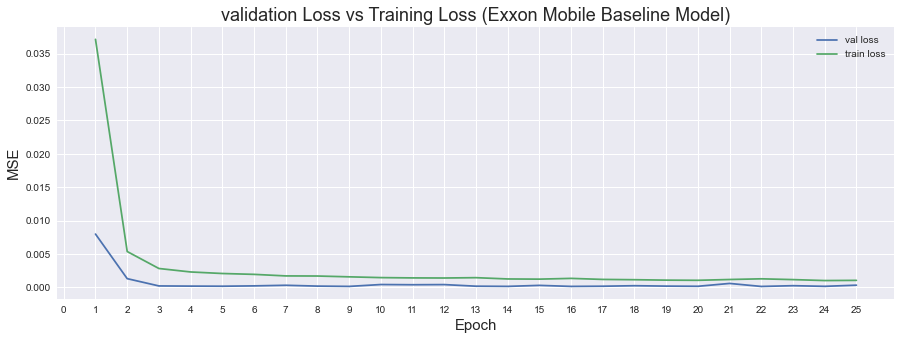

In [134]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(1,26,1),e_b_df['val_loss'] ,label="val loss")
plt.plot(np.arange(1,26,1),e_b_df['loss'],label="train loss")
plt.xticks(np.arange(0,26,1))
plt.title('validation Loss vs Training Loss (Exxon Mobile Baseline Model)',fontsize=18)
plt.ylabel('MSE',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.legend()
plt.show()

In [135]:
val_loss_per_epoch = e_b_df['val_loss']
best_epoch = best_epoch_a=val_loss_per_epoch[e_b_df["val_loss"]==min(val_loss_per_epoch)].index[0]+1
print('Best epoch: %d' % (best_epoch,))


Best epoch: 22


In [136]:
print(f' best validation for the base model: {min(e_b_df["val_loss"])}')

 best validation for the base model: 0.00013458289322443306


In [137]:
loss_exxon_b,mae_exxon_b=exxon_model_basic.evaluate(X_test3, y_test3)

65/65 [==============================] - ETA: 39s - loss: 2.3078e-04 - mean_absolute_error: 0.01 - ETA: 0s - loss: 3.5438e-04 - mean_absolute_error: 0.0122 - ETA: 0s - loss: 3.3966e-04 - mean_absolute_error: 0.011 - ETA: 0s - loss: 3.2834e-04 - mean_absolute_error: 0.011 - ETA: 0s - loss: 3.2288e-04 - mean_absolute_error: 0.011 - 1s 4ms/step - loss: 3.2184e-04 - mean_absolute_error: 0.0116


In [138]:
print(f"baseline model validation loss: {loss_exxon_b}, mean absulote error: {mae_exxon_b}")

baseline model validation loss: 0.000324555003317073, mean absulote error: 0.011675451882183552


In [139]:
#get the models predicted price value
predictions_b_e=exxon_model_basic.predict(x_test_exxon)
predictions_b_e=scaler_exxon.inverse_transform(predictions_b_e)

In [140]:
#get the root mean square error(RMSE) it is higher than model's mse because its on actual prices and the model is on 
#scaled prices
np.sqrt(mean_squared_error(y_test_exxon, predictions_b_e))

3.860572151622367

<function matplotlib.pyplot.show(close=None, block=None)>

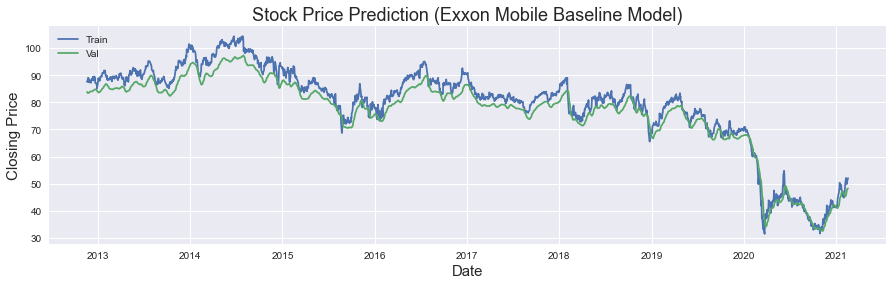

In [141]:
train_e_b=data[:exxon_training_data_len]
valid_e_b=data[exxon_training_data_len:]
valid_e_b['predictions']=predictions_b_e
plt.figure(figsize=(15,4))
plt.title("Stock Price Prediction (Exxon Mobile Baseline Model)",fontsize=18)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Closing Price",fontsize=15)
# plt.plot(train_d_b["Close"])
plt.plot(valid_e_b[['Close',"predictions"]])
plt.legend(["Train","Val","Predictions"],loc='upper left')
plt.show

In [142]:
#as we have same amount of variables in the 4 models i will use r^2 to evaluate and compair models
adj_r_e_b=1 - (1-sklearn.metrics.r2_score(valid_e_b["Close"],valid_e_b["predictions"]))*(valid_e_b["predictions"].shape[0]-1)/(valid_e_b["predictions"].shape[0]-1-1)
print("adj R squared: {}".format(adj_r_e_b))
df_adj_r2=df_adj_r2.append({"name of the model":"exxon mobile baseline model","adj R^2":adj_r_e_b},ignore_index=True)

adj R squared: 0.9416352369693844


# accuracy exxon baseline model within 5%

In [143]:
p5=[]
for i in range(valid_e_b.shape[0]):
    if valid_e_b['predictions'][i]<=(valid_e_b['Close'][i]*1.05) and valid_e_b['predictions'][i]>=(valid_e_b['Close'][i]*0.95):
        p5.append(int(1))
    else:
        p5.append(int(0))
valid_e_b["p5%"]=p5
valid_e_b["v"]=np.ones((valid_e_b.shape[0],), dtype=int)
print(f'exxon baseline model accuracy: {sklearn.metrics.accuracy_score(valid_e_b["v"],valid_e_b["p5%"])}')

exxon baseline model accuracy: 0.6639344262295082


# accuracy exxon baseline model within 3%

In [144]:
p3=[]
for i in range(valid_e_b.shape[0]):
    if valid_e_b['predictions'][i]<=(valid_e_b['Close'][i]*1.03) and valid_e_b['predictions'][i]>=(valid_e_b['Close'][i]*0.97):
        p3.append(int(1))
    else:
        p3.append(int(0))
valid_e_b["p3%"]=p3
valid_e_b["v"]=np.ones((valid_e_b.shape[0],), dtype=int)
print(f'exxon basic model accuracy: {sklearn.metrics.accuracy_score(valid_e_b["v"],valid_e_b["p3%"])}')

exxon basic model accuracy: 0.2907425265188042


# accuracy exxon baseline model within 1.5%

In [145]:
p15=[]
for i in range(valid_e_b.shape[0]):
    if valid_e_b['predictions'][i]<=(valid_e_b['Close'][i]*1.015) and valid_e_b['predictions'][i]>=(valid_e_b['Close'][i]*0.985):
        p15.append(int(1))
    else:
        p15.append(int(0))
valid_e_b["p1.5%"]=p15
valid_e_b["v"]=np.ones((valid_e_b.shape[0],), dtype=int)
print(f'exxon basic model accuracy: {sklearn.metrics.accuracy_score(valid_e_b["v"],valid_e_b["p1.5%"])}')

exxon basic model accuracy: 0.11620057859209257


In [146]:
valid_e_b.head()

,Close,predictions,p5%,v,p3%,p1.5%
Date,,,,,,
2012-11-19,87.669998,83.831238,1,1,0,0
2012-11-20,87.500000,83.604736,1,1,0,0
2012-11-21,88.010002,83.471466,0,1,0,0
2012-11-23,89.089996,83.434769,0,1,0,0
2012-11-26,88.620003,83.523636,0,1,0,0


In [147]:
# m=[np.nan]
# for i in range(0,valid_e_b.shape[0]-1):
#     if ((valid_e_b['predictions'][i+1]-valid_e_b['predictions'][i])*( valid_e_b['Close'][i+1]- valid_e_b['Close'][i]))>0:
#         m.append(int(1))
#     else:
#         m.append(int(0))
# valid_e_b["m"]=m
# valid_e_b.dropna(inplace=True)
# sklearn.metrics.accuracy_score(valid_e_b["v"],valid_e_b["m"])

# exxon tunned model

In [148]:
# log_dir=f"{int(time.time())}"

In [149]:
# #build the lstm model
# def build_model_d(hp):
#     exxon_model=tf.keras.Sequential()
#     exxon_model.add(LSTM(256,return_sequences=True,input_shape=(X_train3.shape[1],1)))
#     exxon_model.add(Dropout(rate = 0.3))##add 2rd lstm layer
#     exxon_model.add(LSTM(units =64, return_sequences = False))
#     exxon_model.add(Dropout(rate =0.2 ))
#     exxon_model.add(Dense(64))    
#     exxon_model.add(Dense(1))
#     hp_learning_rate = hp.Choice('learning_rate', values=[0.01,0.015,0.02,0.9])
#     #0.01,0.1,0.0001,0.001,
#     #hp_decay = hp.Choice('decay', values=[1e-5,1e-4,1e-3,0.01])
#     exxon_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])
#     return exxon_model

In [150]:
# log_dir

In [151]:
# tuner=RandomSearch(build_model_d,
#                   objective="val_loss",
#                   max_trials=10,
#                   executions_per_trial=1,
#                    directory=log_dir
#                   )
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# tuner.search(x=X_train3,y=y_train3,epochs=25,batch_size=1024,validation_data=(X_test3,y_test3),callbacks=[stop_early])


In [152]:
# best_hps=tuner.get_best_hyperparameters(num_trials=1)[0].values
# best_hps

In [153]:
# tuner.results_summary()

# check point of the best model

In [154]:
e_checkpoint_path = "train_ckpt_exxon/cp.ckpt"
#e_cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=e_checkpoint_path,save_best_only=True, save_weights_only=True, verbose=1)

In [155]:
#disny stock not tuned hyper parametter
exxon_model_tuned=tf.keras.Sequential()
exxon_model_tuned.add(LSTM(256,return_sequences=True,input_shape=(X_train3.shape[1],1)))
exxon_model_tuned.add(Dropout(rate = 0.3))##add lstm layer
exxon_model_tuned.add(LSTM(units =64, return_sequences = False))
exxon_model_tuned.add(Dropout(rate = 0.2))##add 3rd lstm layer
exxon_model_tuned.add(Dense(64))
exxon_model_tuned.add(tf.keras.layers.Dense( 1)) 
exxon_model_tuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [156]:
exxon_model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 60, 256)           264192    
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 350,593
Trainable params: 350,593
Non-trainable params: 0
________________________________________________

In [157]:
exxon_model_tuned.load_weights(e_checkpoint_path)

In [158]:
#e_tuned_history=exxon_model_tuned.fit(X_train3, y_train3,batch_size=128, validation_data=(X_test3, y_test3),epochs=250,callbacks=[e_cp_callback])

In [159]:
# e_t_h=e_tuned_history.history
# e_t_df=pd.DataFrame.from_dict(e_t_h)
# e_t_df
# e_t_df.to_pickle("./e_t_df.pkl")
e_t_df=pd.read_pickle("./e_t_df.pkl")

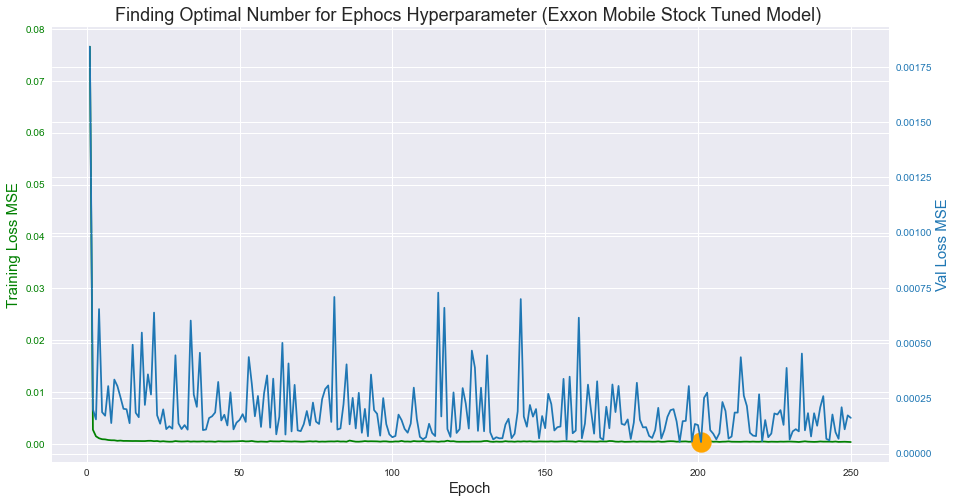

In [160]:
fig,ax1=plt.subplots(figsize=(15,8))
color1 = 'green'
ax1.set_xlabel('Epoch',fontsize=15)
ax1.set_ylabel("Training Loss MSE", color=color1,fontsize=15)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.plot(np.arange(1,251,1),e_t_df['loss'],color=color1)
ax2=ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel("Val Loss MSE", color=color2,fontsize=15)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.plot(np.arange(1,251,1),e_t_df['val_loss'],color=color2)

best_epoch_exxon=e_t_df.index[e_t_df["val_loss"]==min(e_t_df["val_loss"])]
plt.scatter([best_epoch_exxon[0]+1],[e_t_df.loc[:,"val_loss"][best_epoch_exxon[0]]],color="orange",s=400)
plt.title('Finding Optimal Number for Ephocs Hyperparameter (Exxon Mobile Stock Tuned Model) ',fontsize=18)
plt.show()

In [161]:
val_loss_per_epoch = e_t_df['val_loss']
best_epoch_e =val_loss_per_epoch[e_t_df["val_loss"]==min(val_loss_per_epoch)].index[0]+1
print('Best epoch: %d' % (best_epoch_e,))

Best epoch: 201


In [162]:
print(f' best validation loss: {min(e_t_df["val_loss"])}')

 best validation loss: 5.204983608564362e-05


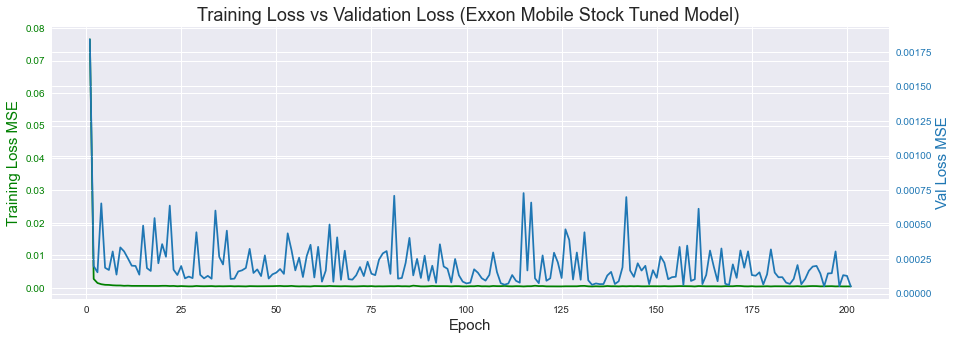

In [163]:
best_epoch_exxon=e_t_df.index[e_t_df["val_loss"]==min(e_t_df["val_loss"])]
fig,ax1=plt.subplots(figsize=(15,5))
color1 = 'green'
ax1.set_ylabel("Training Loss MSE", color=color1,fontsize=15)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.plot(np.arange(1,best_epoch_exxon[0]+2,1),e_t_df['loss'][0:best_epoch_exxon[0]+1],color=color1)
ax1.set_xlabel("Epoch",fontsize=15)
ax2=ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel("Val Loss MSE", color=color2,fontsize=15)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.plot(np.arange(1,best_epoch_exxon[0]+2,1),e_t_df['val_loss'][0:best_epoch_exxon[0]+1],color=color2)

plt.title('Training Loss vs Validation Loss (Exxon Mobile Stock Tuned Model) ',fontsize=18)
plt.show()

In [164]:
loss_exxon,mae_exxon=exxon_model_tuned.evaluate(X_test3, y_test3)

65/65 [==============================] - ETA: 41s - loss: 3.1966e-05 - mean_absolute_error: 0.00 - ETA: 1s - loss: 5.0965e-05 - mean_absolute_error: 0.0046 - ETA: 1s - loss: 5.7786e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.9808e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.9377e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.8857e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.8387e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.8139e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.7763e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.7368e-05 - mean_absolute_error: 0.004 - ETA: 1s - loss: 5.6750e-05 - mean_absolute_error: 0.004 - ETA: 0s - loss: 5.6124e-05 - mean_absolute_error: 0.004 - ETA: 0s - loss: 5.5712e-05 - mean_absolute_error: 0.004 - ETA: 0s - loss: 5.5255e-05 - mean_absolute_error: 0.004 - ETA: 0s - loss: 5.4847e-05 - mean_absolute_error: 0.004 - ETA: 0s - loss: 5.4562e-05 - mean_absolute_error: 0.004 - ETA: 0s - loss: 5.4360e-05 - m

In [165]:
print(f"best validation loss: {loss_exxon}, mean absulote error: {mae_exxon}")

best validation loss: 5.204982153372839e-05, mean absulote error: 0.004555582534521818


In [166]:

#get the models predicted price value
predictions_t_e=exxon_model_tuned.predict(x_test_exxon)
predictions_t_e=scaler_exxon.inverse_transform(predictions_t_e)

In [167]:
print(f'optimized exxon model RMSE in dollars($): {np.sqrt(mean_squared_error(y_test_exxon, predictions_t_e))}')

optimized exxon model RMSE in dollars($): 1.26612287202917


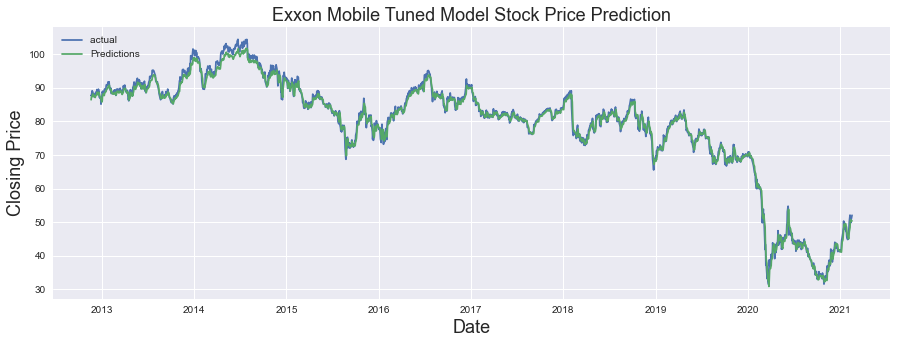

In [168]:
train_e_t=data[:exxon_training_data_len]
valid_e_t=data[exxon_training_data_len:]
valid_e_t['predictions']=predictions_t_e
plt.figure(figsize=(15,5))
plt.title("Exxon Mobile Tuned Model Stock Price Prediction",fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Closing Price",fontsize=18)
# plt.plot(train_d_t["Close"])
plt.plot(valid_e_t[['Close',"predictions"]])
plt.legend(["actual ","Predictions"],loc='upper left')
plt.show()

In [169]:

valid_e_t["mape"]=valid_e_t.apply(lambda row: mape(row),axis=1)

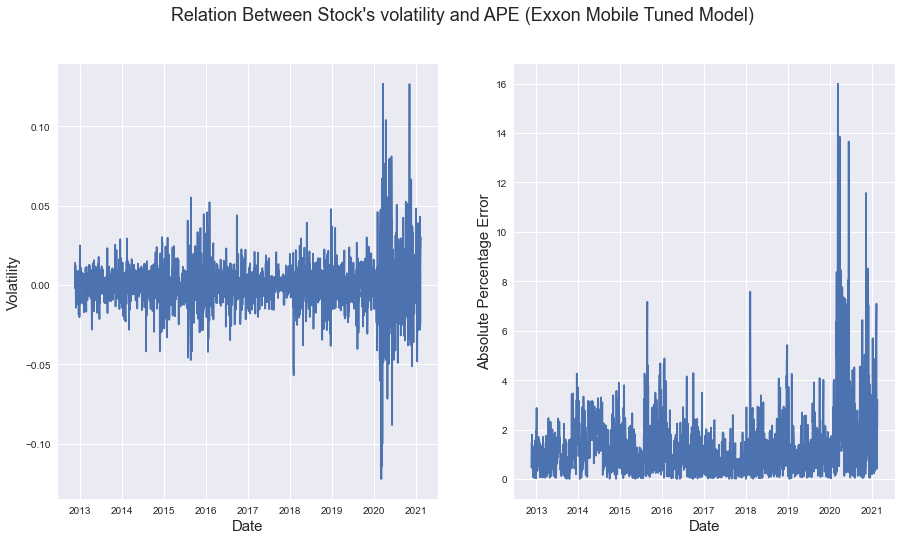

In [170]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
fig.suptitle("Relation Between Stock's volatility and APE (Exxon Mobile Tuned Model)",fontsize=18)
ax2.plot(exxon[exxon_training_data_len:].index,valid_e_t['mape'])
# ax2.set_title("Mean Absolute Percentage Error on Test Data(Exxon Mobile Tuned Model)",fontsize=15)
ax2.set_ylabel("Absolute Percentage Error",fontsize=15)
ax2.set_xlabel("Date",fontsize=15)
ax1.plot(exxon[exxon_training_data_len:]["returns"])
ax1.set_xlabel("Date",fontsize=15)
ax1.set_ylabel("Volatility",fontsize=15)
# ax1.set_title("Volatility of Exxon Mobile Stock(Test Data)",fontsize=14)
plt.show()


In [171]:
#as we have same amount of variables in the 4 models i will use r^2 to evaluate and compair models
adj_r_e_t=1 - (1-sklearn.metrics.r2_score(valid_e_t["Close"],valid_e_t["predictions"]))*(valid_e_t["predictions"].shape[0]-1)/(valid_e_t["predictions"].shape[0]-1-1)
print("adj R squared: {}".format(adj_r_e_t))
df_adj_r2=df_adj_r2.append({"name of the model":"exxon mobile tuned model","adj R^2":adj_r_e_t},ignore_index=True)

adj R squared: 0.9937223212458218


In [172]:
df_adj_r2.sort_values(["adj R^2"])

,name of the model,adj R^2
0,apple basline model,0.786796
2,exxon mobile baseline model,0.941635
1,apple tuned model,0.990546
3,exxon mobile tuned model,0.993722


# checking exxon mobile model accuracy for predicted price within 5% of actual price

In [173]:
p5=[]
for i in range(valid_e_t.shape[0]):
    if valid_e_t['predictions'][i]<=(valid_e_t['Close'][i]*1.05) and valid_e_t['predictions'][i]>=(valid_e_t['Close'][i]*0.95):
        p5.append(int(1))
    else:
        p5.append(int(0))
valid_e_t["p5%"]=p5
valid_e_t["v"]=np.ones((valid_e_t.shape[0],), dtype=int)
print(f'exxon optimal model accuracy (5%): {sklearn.metrics.accuracy_score(valid_e_t["v"],valid_e_t["p5%"])}')

exxon optimal model accuracy (5%): 0.9802314368370298


# checking exxon mobile model accuracy for predicted price within 3% of actual price

In [174]:
p3=[]
for i in range(valid_e_t.shape[0]):
    if valid_e_t['predictions'][i]<=(valid_e_t['Close'][i]*1.03) and valid_e_t['predictions'][i]>=(valid_e_t['Close'][i]*0.97):
        p3.append(int(1))
    else:
        p3.append(int(0))
valid_e_t["p3%"]=p3
valid_e_t["v"]=np.ones((valid_e_t.shape[0],), dtype=int)
print(f'exxon optimal model accuracy (3%): {sklearn.metrics.accuracy_score(valid_e_t["v"],valid_e_t["p3%"])}')

exxon optimal model accuracy (3%): 0.9214079074252652


# checking exxon mobile model accuracy for predicted price within 1.5% of actual price

In [175]:
p15=[]
for i in range(valid_e_t.shape[0]):
    if valid_e_t['predictions'][i]<=(valid_e_t['Close'][i]*1.015) and valid_e_t['predictions'][i]>=(valid_e_t['Close'][i]*0.985):
        p15.append(int(1))
    else:
        p15.append(int(0))
valid_e_t["p1.5%"]=p15
valid_e_t["v"]=np.ones((valid_e_t.shape[0],), dtype=int)
print(f'exxon optimal model accuracy (1.5%): {sklearn.metrics.accuracy_score(valid_e_t["v"],valid_e_t["p1.5%"])}')

exxon optimal model accuracy (1.5%): 0.695274831243973


In [176]:
valid_e_t

,Close,predictions,mape,p5%,v,p3%,p1.5%
Date,,,,,,,
2012-11-19,87.669998,86.403702,1.444390,1,1,1,1
2012-11-20,87.500000,87.100983,0.456020,1,1,1,1
2012-11-21,88.010002,87.201118,0.919082,1,1,1,1
2012-11-23,89.089996,87.490974,1.794839,1,1,1,0
2012-11-26,88.620003,88.158951,0.520257,1,1,1,1
...,...,...,...,...,...,...,...
2021-02-09,50.630001,50.232498,0.785113,1,1,1,1
2021-02-10,51.119999,50.477879,1.256104,1,1,1,1
2021-02-11,49.840000,50.722260,1.770183,1,1,1,0


In [177]:
print("{}%".format(mean_absolute_percentage_error(valid_e_t["Close"],valid_e_t["predictions"])))

1.2949765843261236%


# exxon tunning graphs

In [178]:
layers_exxon=pd.read_excel("thesis excel xommobile.xlsx", sheet_name="layers",engine='openpyxl')
layers_exxon.dropna(inplace=True)

#,sheet_name="number of layers"

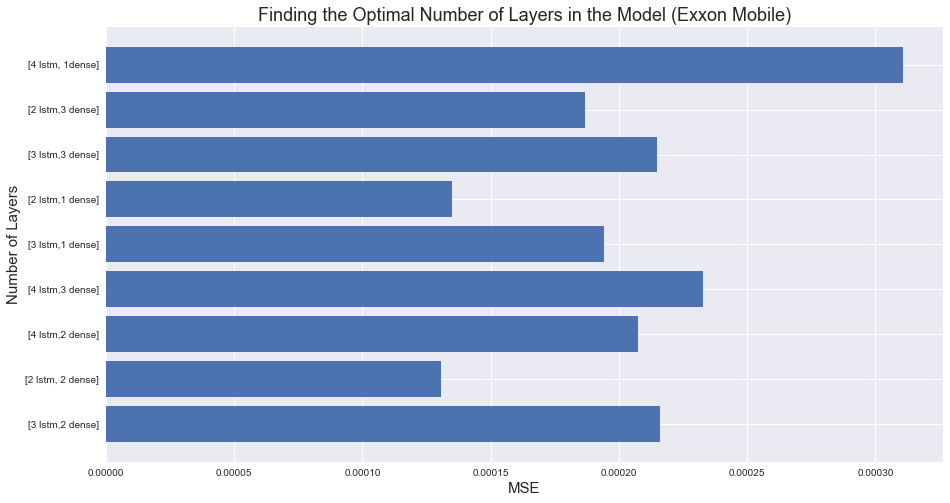

In [179]:
plt.figure(figsize=(15,8))
plt.barh(y=layers_exxon["layers"],width=layers_exxon["mse"])
plt.ylabel("Number of Layers",fontsize=15)
plt.xlabel("MSE",fontsize=15)
plt.title("Finding the Optimal Number of Layers in the Model (Exxon Mobile)",fontsize=18)
plt.show()

In [180]:
pd.set_option('display.float_format', '{:.8f}'.format)
cells_exxon=pd.read_excel("thesis excel xommobile.xlsx",sheet_name="cells", engine='openpyxl')
# cells_exxon=cells_exxon[cells_exxon["mse"]<float(0.0001)]

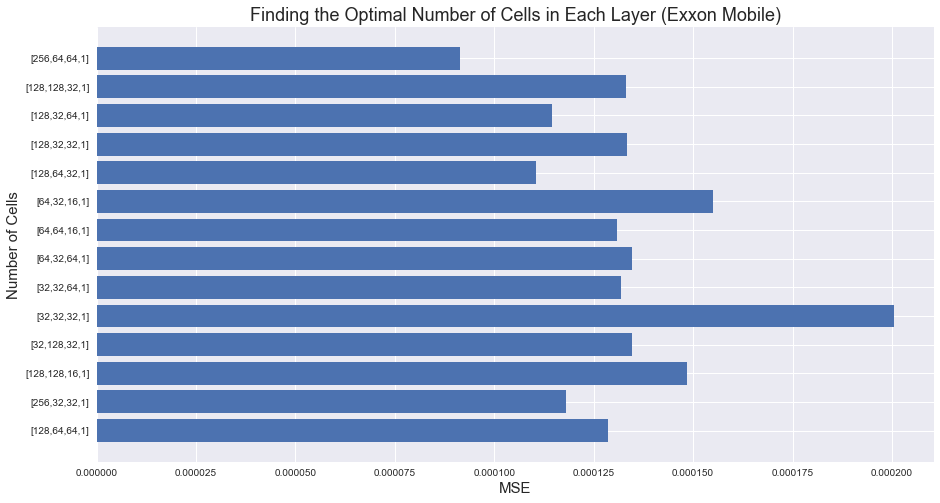

In [181]:
plt.figure(figsize=(15,8))
plt.barh(y=cells_exxon["cells"],width=cells_exxon["mse"])
plt.ylabel("Number of Cells",fontsize=15)
plt.xlabel("MSE",fontsize=15)
plt.title("Finding the Optimal Number of Cells in Each Layer (Exxon Mobile)",fontsize=18)
plt.show()

In [182]:
dropout_exxon=pd.read_excel("thesis excel xommobile.xlsx",sheet_name="dropout", engine='openpyxl')
# dropout_exxon.drop(dropout_exxon.index[3],inplace=True)

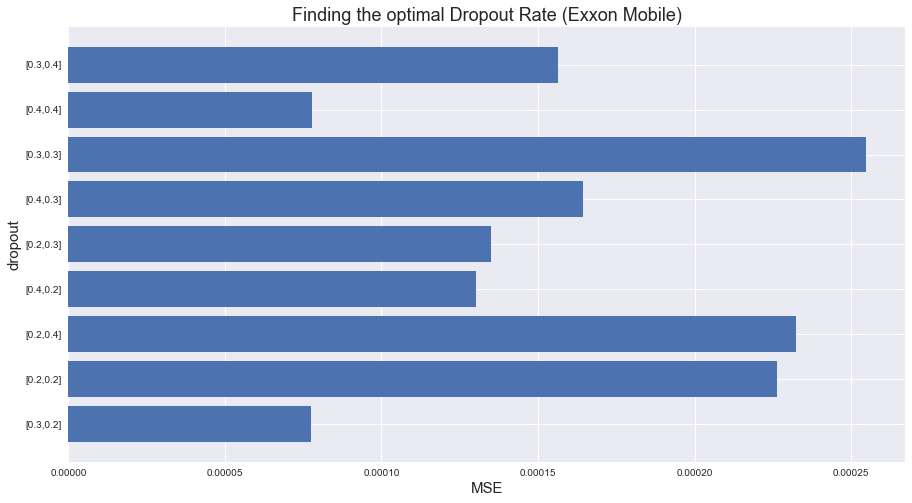

In [183]:
plt.figure(figsize=(15,8))
plt.barh(y=dropout_exxon["dropout"],width=dropout_exxon["mse"])
plt.ylabel("dropout",fontsize=15)
plt.xlabel("MSE",fontsize=15)
plt.title("Finding the optimal Dropout Rate (Exxon Mobile)",fontsize=18)
plt.show()

In [184]:
lr_exxon=pd.read_excel("thesis excel xommobile.xlsx",sheet_name="lr", engine='openpyxl')
lr_exxon.dropna(inplace=True)
lr_exxon.drop(lr_exxon.index[2],inplace=True)
lr_exxon

,lr,mse
0,0.00100000,0.00014827
1,0.00010000,0.00024898
3,0.00001000,0.00570889
4,0.01000000,0.00007752


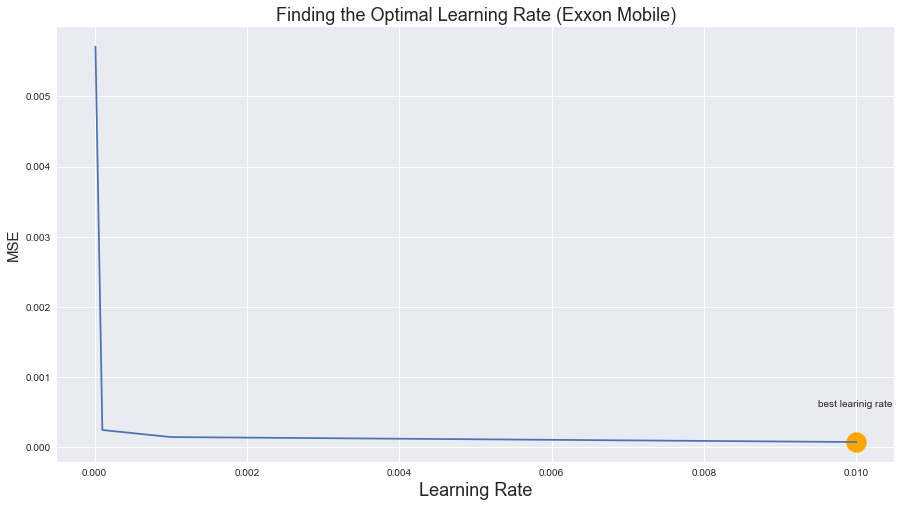

In [185]:
plt.figure(figsize=(15,8))
sns.lineplot(x=lr_exxon["lr"],y=lr_exxon["mse"])
plt.xlabel("Learning Rate",size=18)
plt.ylabel("MSE",fontsize=15)
minimal_index=lr_exxon.index[lr_exxon["mse"]==min(lr_exxon["mse"])]
plt.scatter( [lr_exxon["lr"][minimal_index[0]]],[lr_exxon["mse"][minimal_index[0]]] ,color="orange",s=400)
plt.annotate("best learinig rate", (lr_exxon["lr"][minimal_index],lr_exxon["mse"][minimal_index]),xytext=(lr_exxon["lr"][minimal_index]-0.0005,lr_exxon["mse"][minimal_index]+0.0005))
plt.title("Finding the Optimal Learning Rate (Exxon Mobile)",fontsize=18)
plt.show()

# test for future data 

In [204]:
#get the quate
apple_quate=web.DataReader("XOM",data_source="yahoo",start="2010-01-01",end="2021-06-27")
#create a new dataframe
new_df=apple_quate.filter(["Close"])

#get the last 60 days closing prices value and convert the datafram to array
last_60_days=new_df[-60:]
#scale the data between 0 and 1
last_60_days_scaled=scaler_exxon.transform(last_60_days)
#create an empty list
x_test=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test to numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price=exxon_model_tuned.predict(x_test)
#undo the scaling
pred_price=scaler_exxon.inverse_transform(pred_price)
print(pred_price)

[[64.54456]]


In [199]:
apple_quate_check=web.DataReader("XOM",data_source="yahoo",start="2021-06-28",end="2021-06-28")
apple_quate_check

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-28,64.55999756,62.75000000,64.55999756,63.09500122,8673080,63.09500122
